In [2]:
import pandas as pd

In [184]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 12, 31)
df = web.DataReader(['TSLA','F'], 'yahoo', start, end)
df.tail()
df["Date"] = df.index
df = df[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.head())

Attributes       Date        Open              High               Low        \
Symbols                      TSLA     F        TSLA     F        TSLA     F   
0          2020-12-31  699.989990  8.84  718.719971  8.86  691.119995  8.78   
1          2021-01-04  719.460022  8.81  744.489990  8.84  717.190002  8.43   
2          2021-01-05  723.659973  8.47  740.840027  8.72  719.200012  8.46   
3          2021-01-06  758.489990  8.79  774.000000  8.94  749.099976  8.68   
4          2021-01-07  777.630005  8.94  816.989990  9.08  775.200012  8.88   

Attributes       Close         Adj Close                Volume              
Symbols           TSLA     F        TSLA         F        TSLA           F  
0           705.669983  8.79  705.669983  8.701225  49649900.0  40176500.0  
1           729.770020  8.52  729.770020  8.433952  48638200.0  85043100.0  
2           735.109985  8.65  735.109985  8.562639  32245200.0  70127800.0  
3           755.979980  8.84  755.979980  8.750721  44700000.

In [128]:
df.index

RangeIndex(start=0, stop=253, step=1)

In [95]:
#df.to_csv('stock.csv', mode='a', index=False)

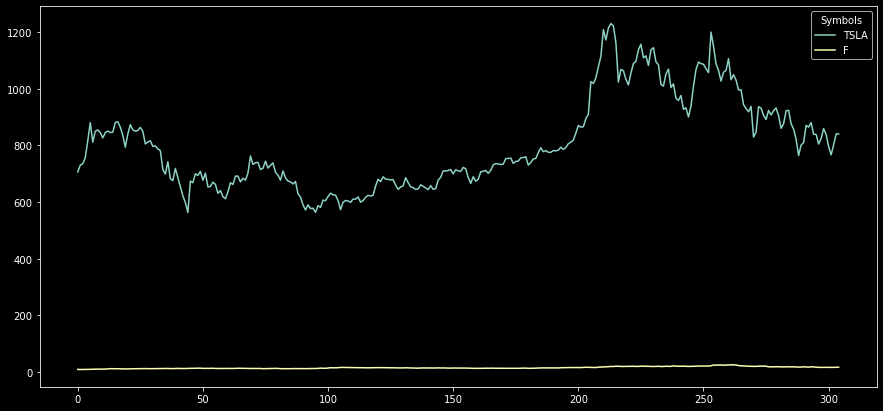

In [166]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df['Adj Close'].plot()

In [167]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

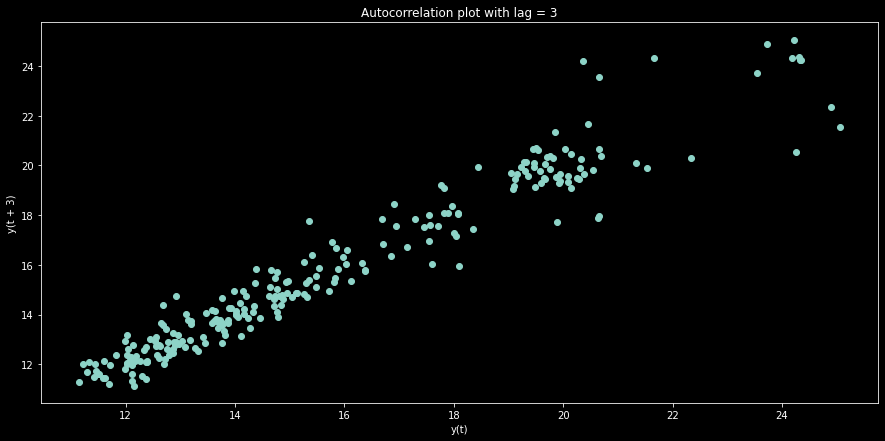

In [178]:
plt.figure()
lag_plot(df['Adj Close'], lag=3)
plt.title('Autocorrelation plot with lag = 3')
plt.show()

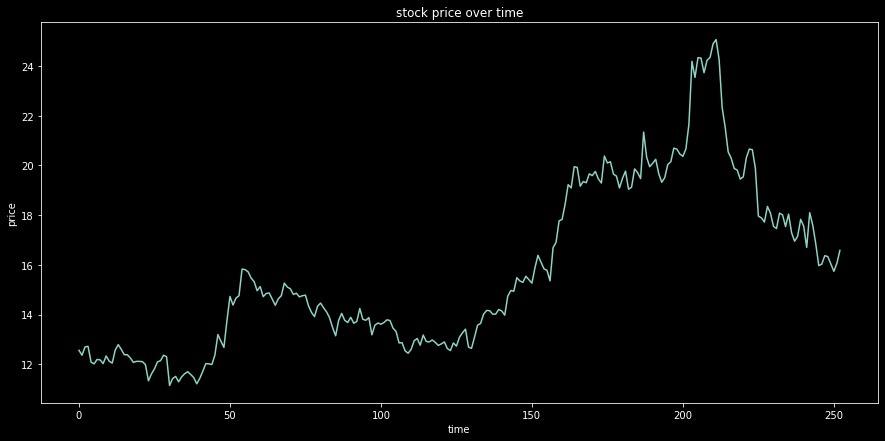

In [179]:
plt.plot(df["Adj Close"])
plt.title("stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [211]:
#Ford dataset
import pandas as pd
df = pd.read_csv("F.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,8.81,8.84,8.43,8.52,8.433952,85043100
1,2021-01-05,8.47,8.72,8.46,8.65,8.562639,70127800
2,2021-01-06,8.79,8.94,8.68,8.84,8.750721,72590200
3,2021-01-07,8.94,9.08,8.88,9.06,8.968499,77117100
4,2021-01-08,9.10,9.14,8.89,9.00,8.909105,59162200


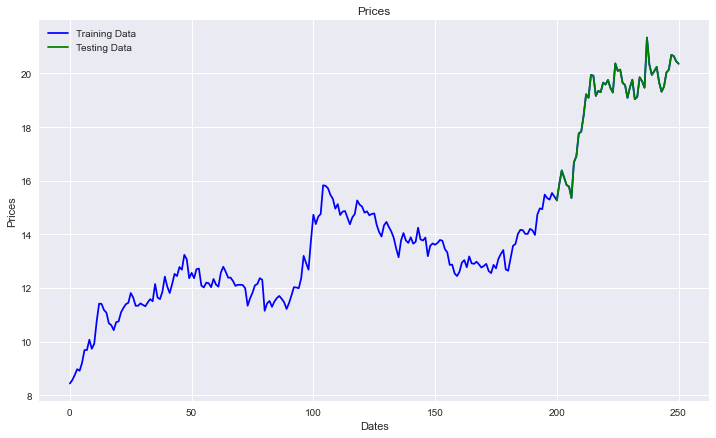

In [203]:
#splitting of the dataset
import matplotlib.pyplot as plt
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [187]:
#ARIMA model results
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Adj Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  250
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -108.323
Method:                       css-mle   S.D. of innovations              0.373
Date:                Thu, 17 Mar 2022   AIC                            224.646
Time:                        12:17:20   BIC                            238.732
Sample:                             1   HQIC                           230.316
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0477      0.020      2.341      0.019       0.008       0.088
ar.L1.D.Adj Close     0.3399      0.338      1.005      0.315      -0.323       1.003
ma.L1.D.Adj Close    -0.4302      0.321     -1.338      0.181      -1.060       0.200
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.9416           +0.0000j            2.9416            0.0000
MA.1            2.3247           +0.0000j            2.3247            0.0000
-----------------------------------------------------------------------------
"""

In [188]:
#ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error 
model=ARIMA(df['Adj Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [int(x) for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
#error2 = smape_kun(test_ar, predictions)
#print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.304


In [189]:
#other error finding metrics
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_ar, predictions)
print('MAE: '+str(mae))
mape = np.mean(np.abs(predictions - test_ar)/np.abs(test_ar))
print('MAPE: '+str(mape))

MAE: 0.4465468432566878
MAPE: 0.0870979760742072


In [159]:
#!pip install scikit-learn==0.24

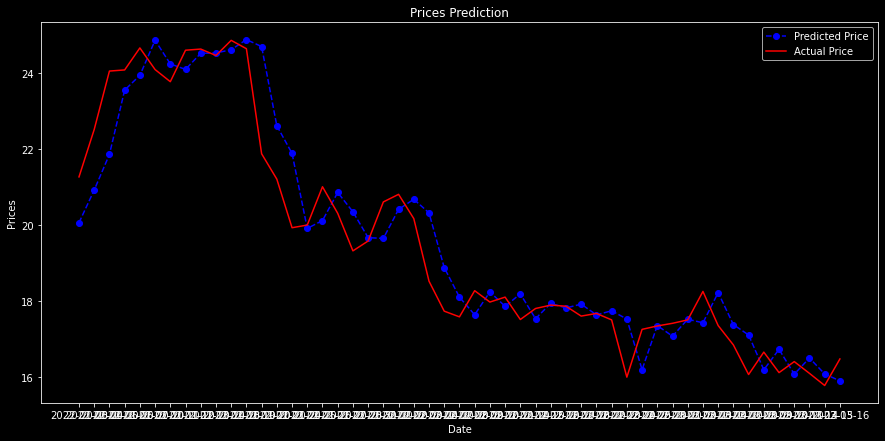

In [160]:
#visualisation of the predicted and actual price for Ford.
test_set_range = df[int(len(df)*0.8):].index
plt.plot(df['Date'][test_set_range], predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(df['Date'][test_set_range], test_ar, color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

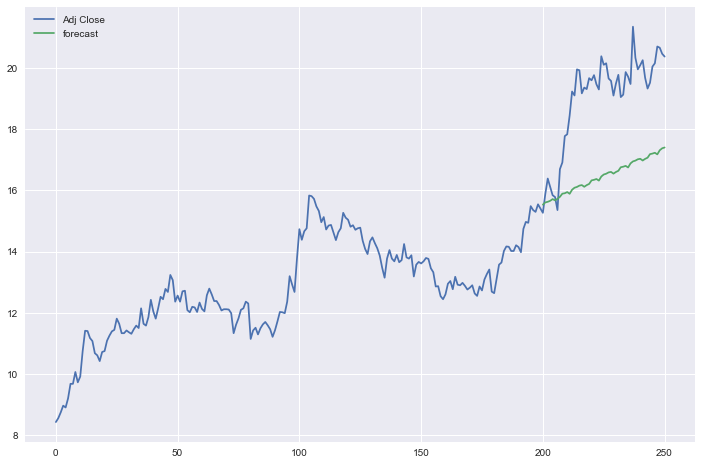

In [212]:
#Visualisation of Adjclose price and forecast price for Ford. 
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Adj Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=200,end=253,dynamic=True)
df[['Adj Close','forecast']].plot(figsize=(12,8))

Tesla

In [214]:
#Tesla dataset
df = pd.read_csv("TSLA.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
1,2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2,2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
3,2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900
4,2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500


In [215]:
df['Date'] = pd.to_datetime(df.Date)

Text(0, 0.5, 'value')

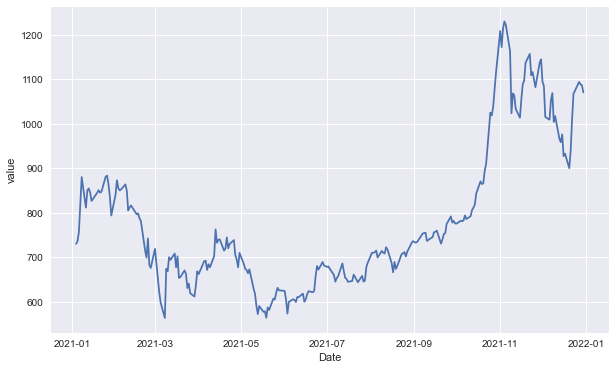

In [216]:
#visualisation of Adj close and Date 
plt.figure(figsize=(10,6))
plt.style.use('seaborn')
plt.plot(df['Date'], df['Adj Close'])
plt.xlabel('Date')
plt.ylabel('value')

In [194]:
# training (80 % ) and test (20%)
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values

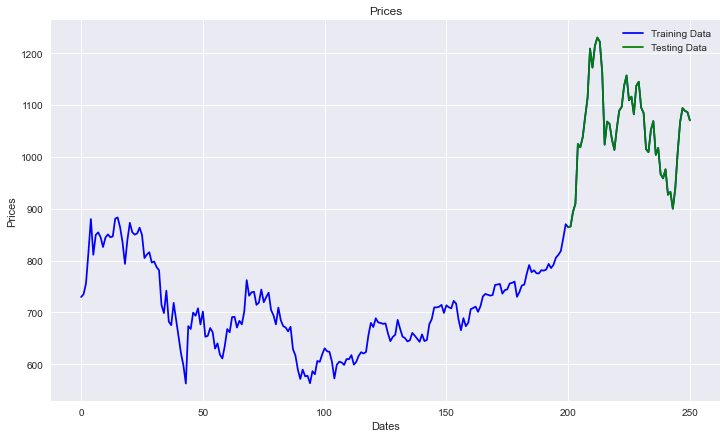

In [205]:
# Visualization of splitting
import matplotlib.pyplot as plt
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [207]:
#ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error 
model=ARIMA(df['Adj Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [int(x) for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
#error2 = smape_kun(test_ar, predictions)
#print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 2679.930


In [208]:
#other metrics
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_ar, predictions)
print('MAE: '+str(mae))
mape = np.mean(np.abs(predictions - test_ar)/np.abs(test_ar))
print('MAPE: '+str(mape))

MAE: 40.14826513456155
MAPE: 0.10506628639374482


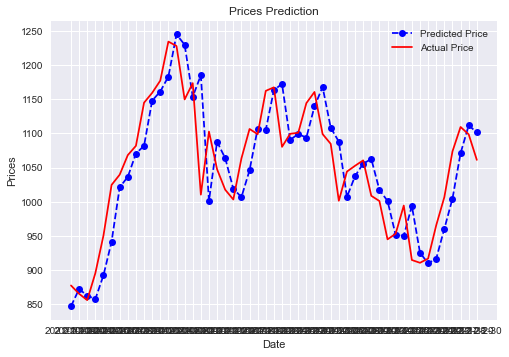

In [209]:
#visualisation of the actual and predicted prices
test_set_range = df[int(len(df)*0.8):].index
plt.plot(df['Date'][test_set_range], predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(df['Date'][test_set_range], test_ar, color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()